Performance Metrics

Graphs and Visualizations

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read in data
results_path = "results/experiment_results.csv"
assert os.path.exists(results_path), f"File not found: {results_path}"
df = pd.read_csv(results_path)
print(df.shape)
df.head()

(591, 10)


,embedding_model,vector_db,chunk_size,overlap,prep_strategy,query,rag_response,response_time,memory_usage_bytes,total_pipeline_time
0,nomic-embed-text,redis,300,0,basic,What is an AVL Tree?,An AVL tree is a self-balancing binary search ...,7.953706,5734400,21.164993
1,nomic-embed-text,redis,300,0,basic,What is the difference between a list where me...,"In a contiguous allocation, all elements of th...",7.570074,5734400,21.164993
2,nomic-embed-text,redis,300,0,basic,When are linked lists faster than contiguously...,Linked lists are faster for inserting anywhere...,1.737709,5734400,21.164993
3,nomic-embed-text,redis,300,50,basic,What is an AVL Tree?,An AVL tree is a self-balancing binary search ...,11.695513,753664,24.532177
4,nomic-embed-text,redis,300,50,basic,What is the difference between a list where me...,"In a contiguous allocation, all the elements o...",7.388046,753664,24.532177


In [3]:
# Gets General timing stats
print("--- General Timing Stats ---")
print(df[["response_time", "total_pipeline_time", "memory_usage_bytes"]].describe())

--- General Timing Stats ---
       response_time  total_pipeline_time  memory_usage_bytes
count     591.000000           591.000000        5.910000e+02
mean       14.415440            86.239729        3.093983e+07
std        12.070965            92.340513        2.587887e+08
min         1.517876            12.930633       -5.162189e+08
25%         5.319689            21.626909       -1.371341e+07
50%        10.250916            69.947546        8.314880e+05
75%        19.475681           105.141898        9.584640e+06
max        55.295606           520.459278        1.544856e+09


In [4]:
# Average response times by embedding model
print("--- Avg Response Time by Embedding Model ---")
print(df.groupby("embedding_model")["response_time"].mean())

--- Avg Response Time by Embedding Model ---
embedding_model
all-distilroberta-v1                                29.853266
distilroberta-base                                  20.564814
nomic-embed-text                                    11.983634
sentence-transformers/all-MiniLM-L6-v2              10.039885
sentence-transformers/all-distilroberta-v1          27.000897
sentence-transformers/all-mpnet-base-v2             29.486019
sentence-transformers/multi-qa-MiniLM-L6-cos-v1     25.100454
sentence-transformers/multi-qa-mpnet-base-dot-v1    40.498287
sentence-transformers/paraphrase-albert-small-v2    16.067865
sentence-transformers/stsb-distilroberta-base-v2    24.537373
stsb-distilroberta-base-v2                          32.213589
Name: response_time, dtype: float64


In [5]:
# Average time by db
print("--- Avg Pipeline Time by Vector DB ---")
print(df.groupby("vector_db")["total_pipeline_time"].mean())

--- Avg Pipeline Time by Vector DB ---
vector_db
chroma    66.055108
redis     97.120502
Name: total_pipeline_time, dtype: float64


In [6]:
# Average memory usage by chunk size
print("--- Avg Memory Usage by Chunk Size ---")
print(df.groupby("chunk_size")["memory_usage_bytes"].mean())

--- Avg Memory Usage by Chunk Size ---
chunk_size
300    6.584815e+07
500   -1.319712e+07
Name: memory_usage_bytes, dtype: float64


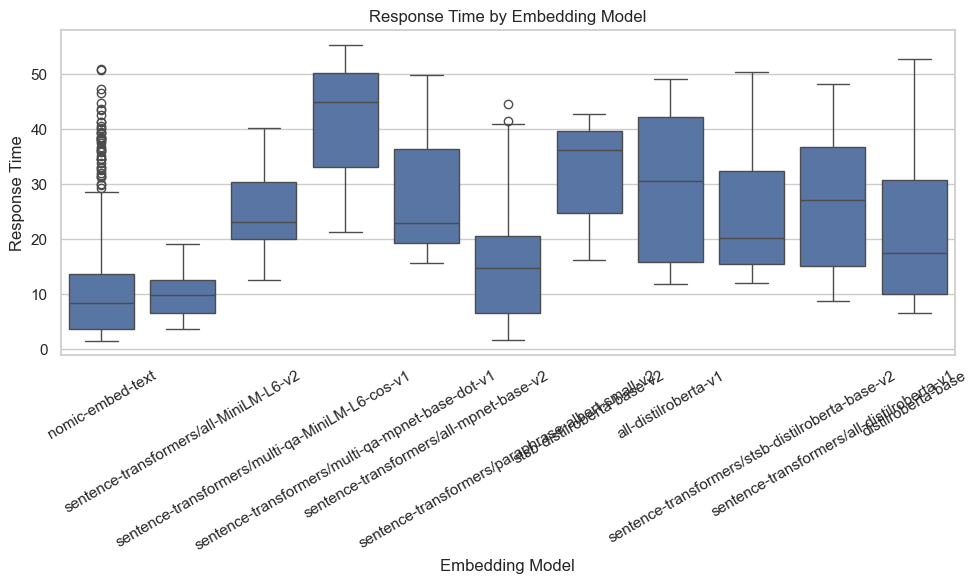

In [7]:
# Set style
sns.set(style="whitegrid")

# Response time by Embedding Model
plt.figure(figsize=(10, 6))
sns.boxplot(x="embedding_model", y="response_time", data=df)
plt.title("Response Time by Embedding Model")
plt.ylabel("Response Time")
plt.xlabel("Embedding Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

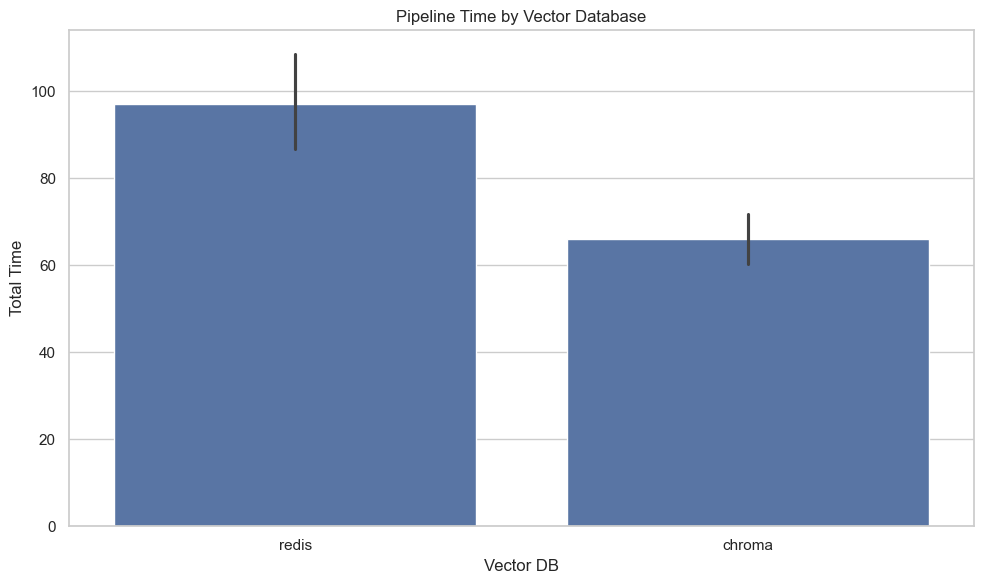

In [8]:
# Total pipeline time by Vector DB
plt.figure(figsize=(10, 6))
sns.barplot(x="vector_db", y="total_pipeline_time", data=df)
plt.title("Pipeline Time by Vector Database")
plt.ylabel("Total Time")
plt.xlabel("Vector DB")
plt.tight_layout()
plt.show()

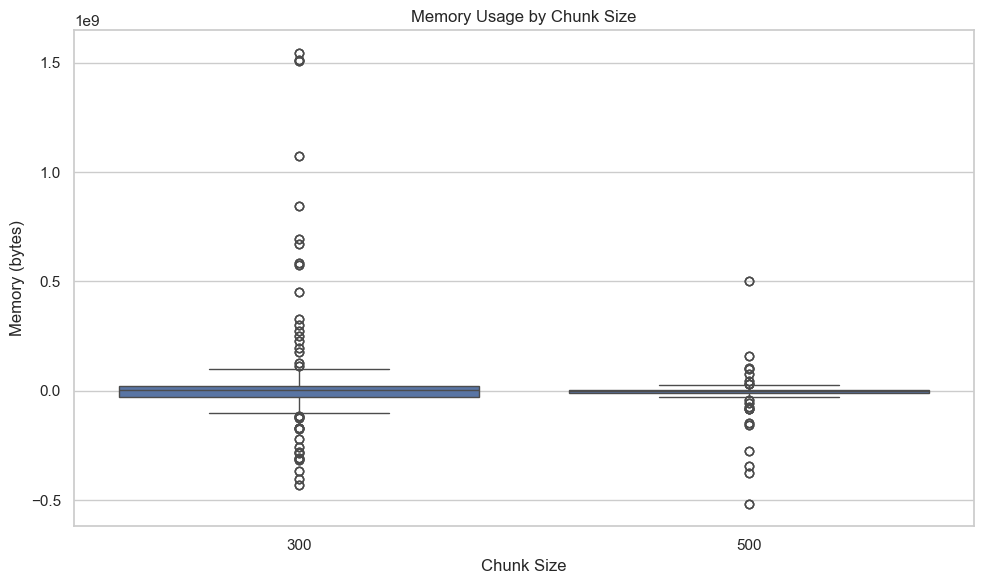

In [9]:
# Memory Usage vs Chunk Size
plt.figure(figsize=(10, 6))
sns.boxplot(x="chunk_size", y="memory_usage_bytes", data=df)
plt.title("Memory Usage by Chunk Size")
plt.ylabel("Memory (bytes)")
plt.xlabel("Chunk Size")
plt.tight_layout()
plt.show()

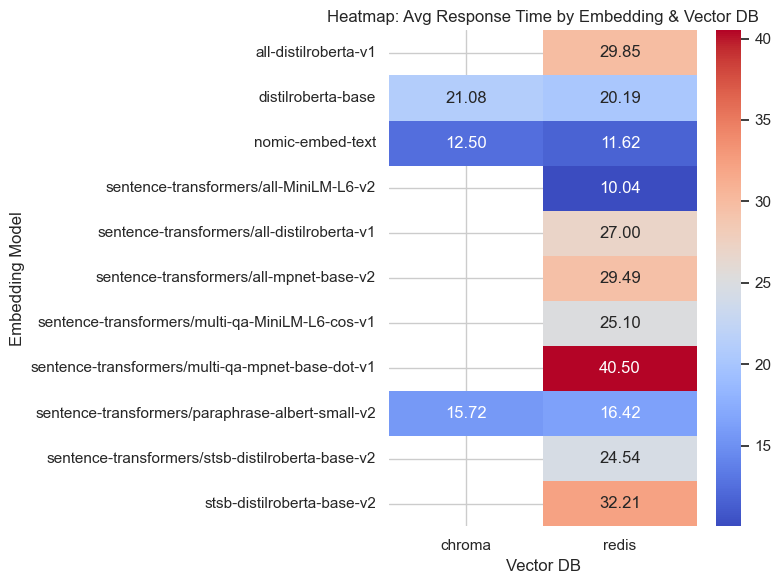

In [10]:
# Heatmap for average response time by Embedding Model and Vector DB
pivot = df.pivot_table(values="response_time", index="embedding_model", columns="vector_db", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap: Avg Response Time by Embedding & Vector DB")
plt.ylabel("Embedding Model")
plt.xlabel("Vector DB")
plt.tight_layout()
plt.show()

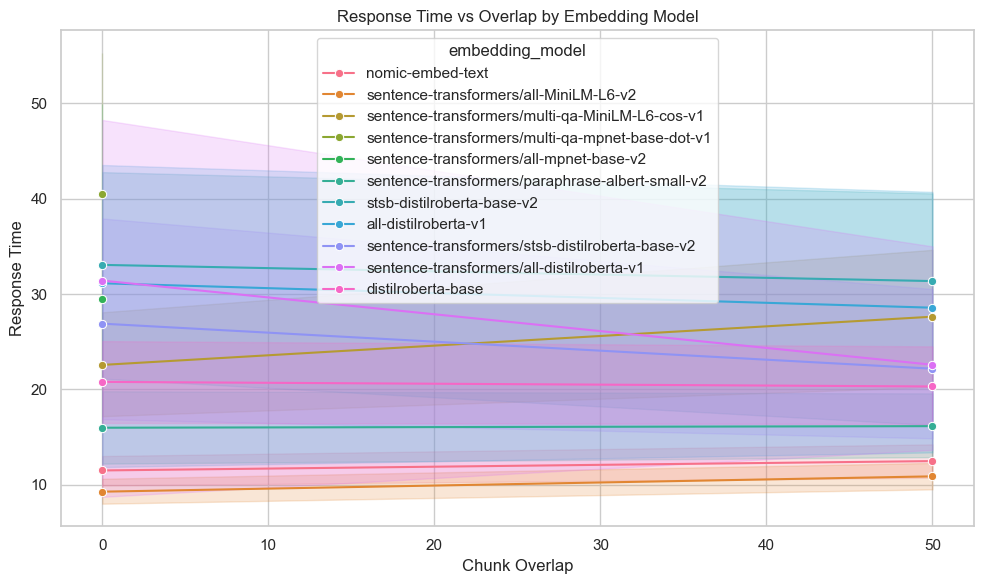

In [11]:
# Response Time vs Overlap (lineplot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="overlap", y="response_time", hue="embedding_model", marker="o")
plt.title("Response Time vs Overlap by Embedding Model")
plt.ylabel("Response Time")
plt.xlabel("Chunk Overlap")
plt.tight_layout()
plt.show()